# Introduction
goal of the project: see  how accurately we can predict recidivism using demographic and criminal history data, such as gender, race, offense type, and drug test results.

will perform a combination of many machine learning method to see which feature influence potential likelihood of recidivism

# Data Exploration

In [2]:
import numpy as np
import pandas as pd



df = pd.read_csv("recidivism.csv")

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18028 entries, 0 to 18027
Data columns (total 53 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 18028 non-null  int64  
 1   Gender                                             18028 non-null  object 
 2   Race                                               18028 non-null  object 
 3   Age_at_Release                                     18028 non-null  object 
 4   Residence_PUMA                                     18028 non-null  int64  
 5   Gang_Affiliated                                    15811 non-null  object 
 6   Supervision_Risk_Score_First                       17698 non-null  float64
 7   Supervision_Level_First                            16816 non-null  object 
 8   Education_Level                                    18028 non-null  object 
 9   Depend

,ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,...,DrugTests_Cocaine_Positive,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3
0,1,M,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,...,0.0,0.000000,0.0,0.488562,0.447610,False,False,False,False,False
1,2,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,...,0.0,0.000000,0.0,0.425234,2.000000,False,True,False,False,True
2,3,M,BLACK,48 or older,24,False,7.0,High,At least some college,3 or more,...,0.0,0.166667,0.0,0.000000,0.000000,False,True,False,True,False
3,4,M,WHITE,38-42,16,False,7.0,High,Less than HS diploma,1,...,0.0,0.000000,0.0,1.000000,0.718996,False,False,False,False,False
4,5,M,WHITE,33-37,16,False,4.0,Specialized,Less than HS diploma,3 or more,...,0.0,0.058824,0.0,0.203562,0.929389,False,True,True,False,False


lots of object type, and boolean type feature that will need to be convert to numerical

In [4]:
df.describe()

,ID,Residence_PUMA,Supervision_Risk_Score_First,Avg_Days_per_DrugTest,DrugTests_THC_Positive,DrugTests_Cocaine_Positive,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year
count,18028.000000,18028.000000,17698.000000,13768.000000,14396.000000,14396.000000,14396.000000,14396.000000,17721.000000,17494.000000
mean,13386.065343,12.307577,6.064753,93.585860,0.063120,0.014173,0.012768,0.007681,0.480035,0.766423
std,7721.451992,7.143255,2.382811,117.561341,0.138357,0.063473,0.059572,0.042224,0.424396,0.813474
min,1.000000,1.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6702.750000,6.000000,4.000000,28.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13405.500000,12.000000,6.000000,55.000000,0.000000,0.000000,0.000000,0.000000,0.466543,0.636324
75%,20081.250000,18.000000,8.000000,110.000000,0.068242,0.000000,0.000000,0.000000,0.966184,1.000000
max,26761.000000,25.000000,10.000000,1087.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


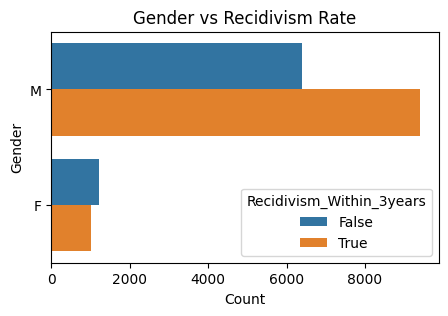

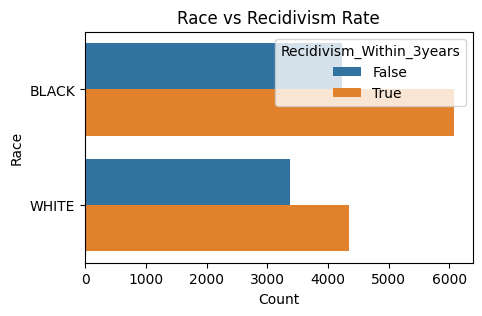

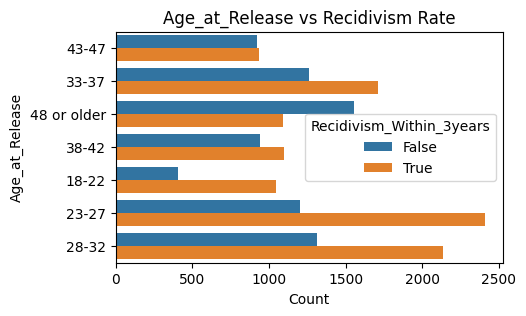

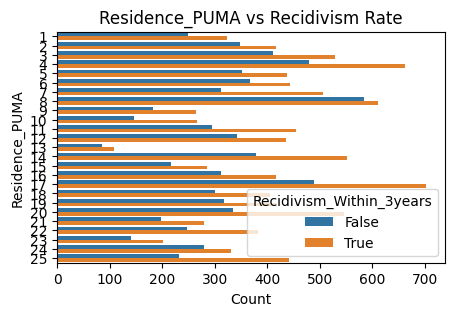

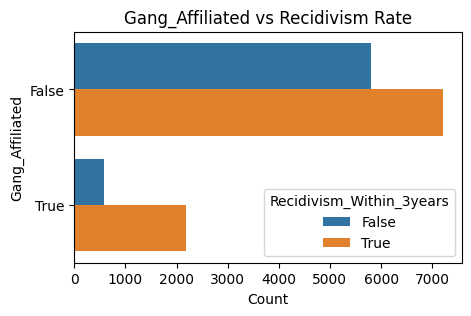

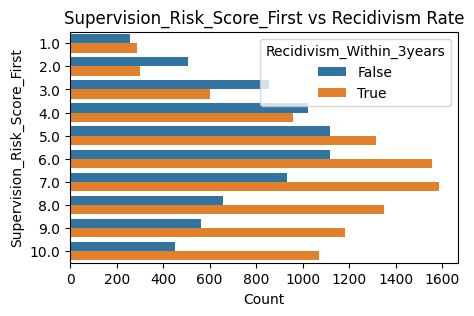

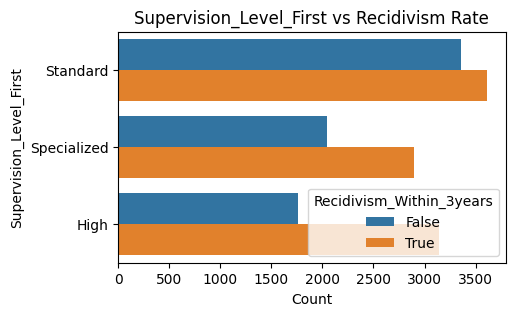

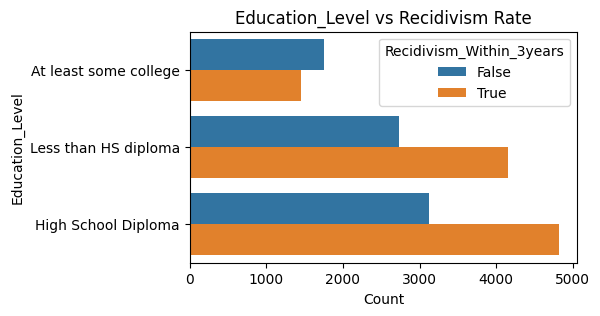

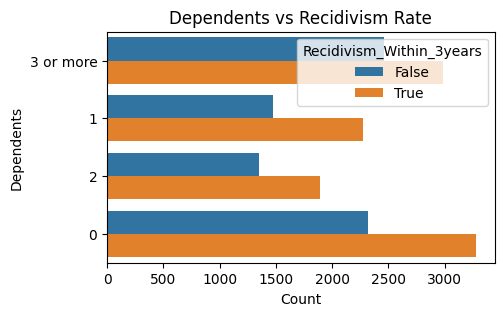

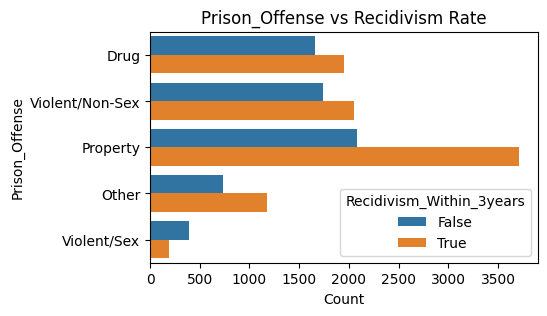

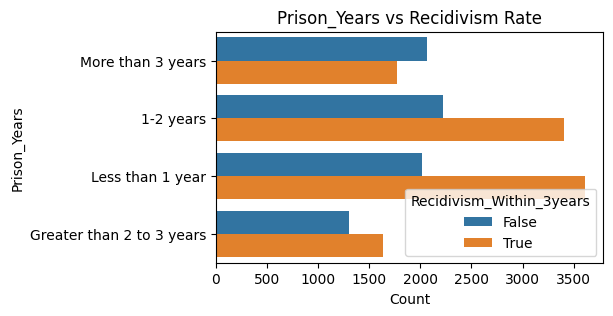

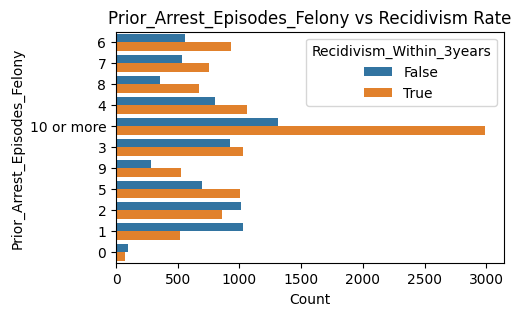

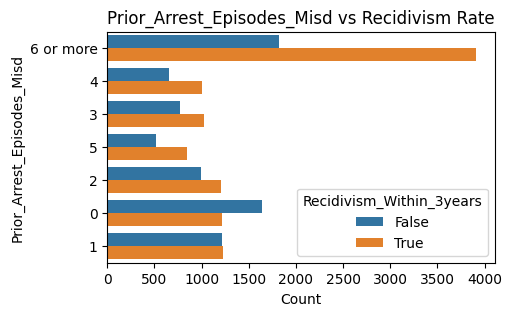

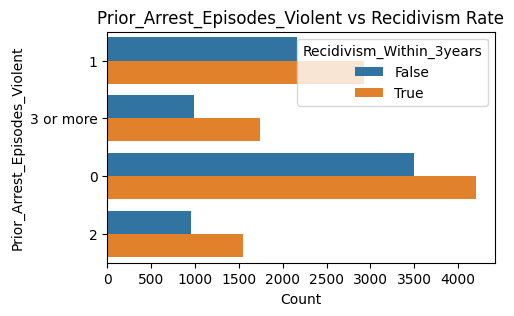

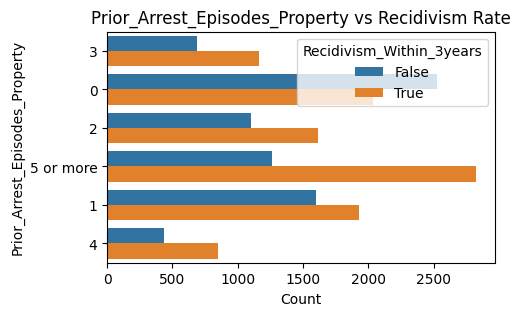

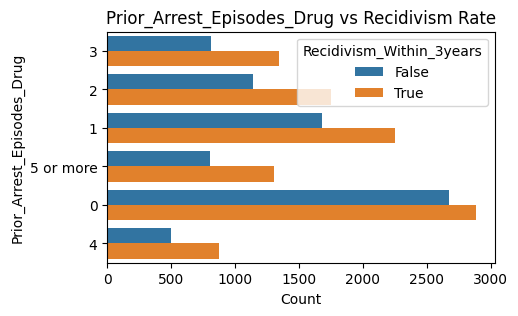

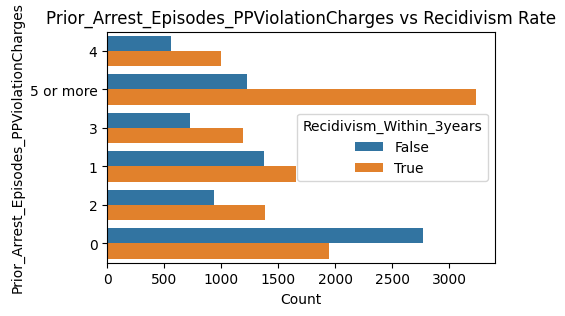

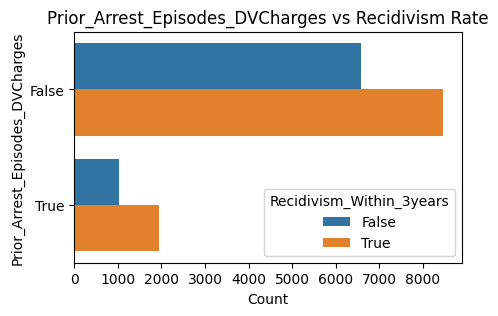

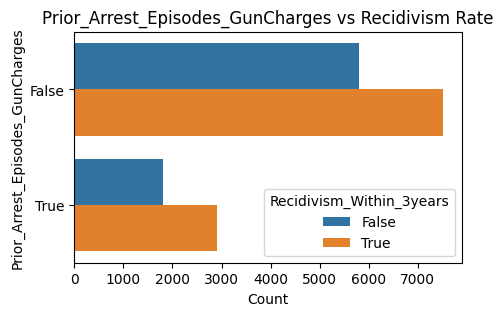

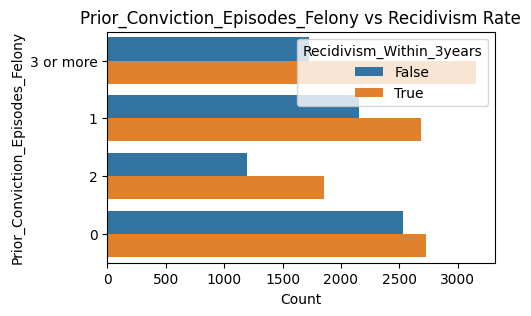

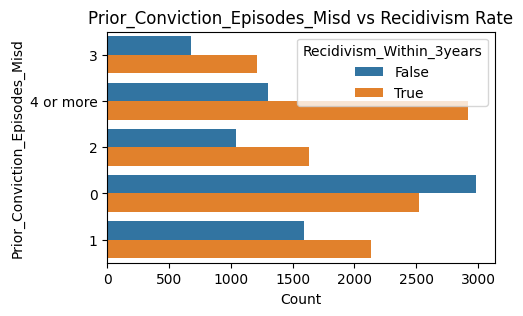

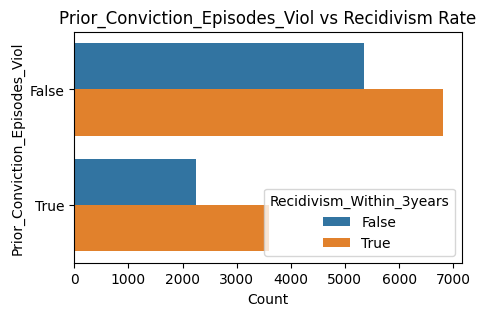

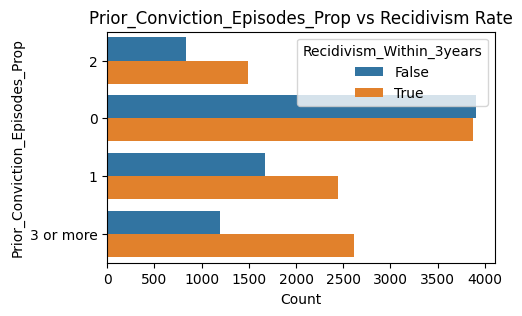

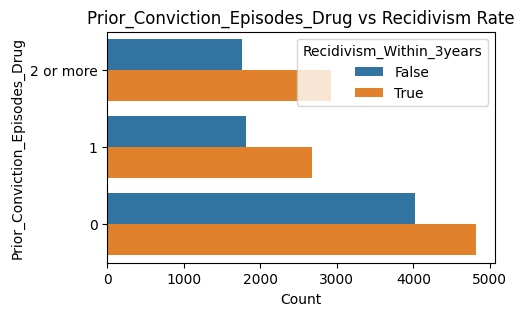

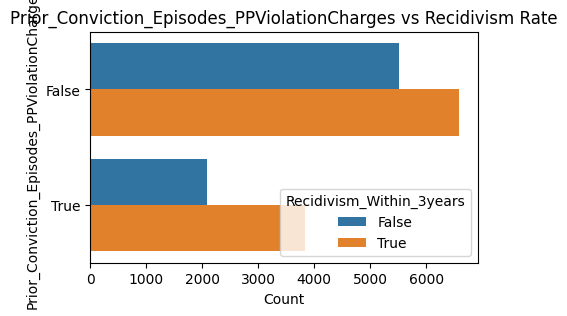

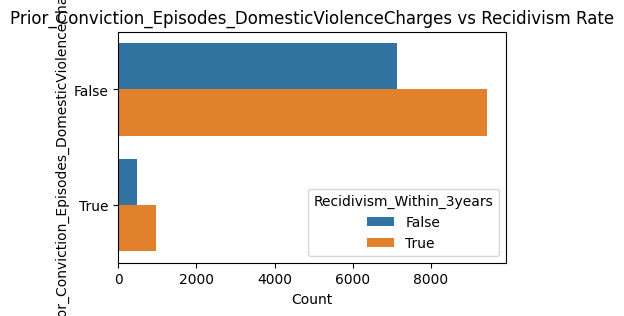

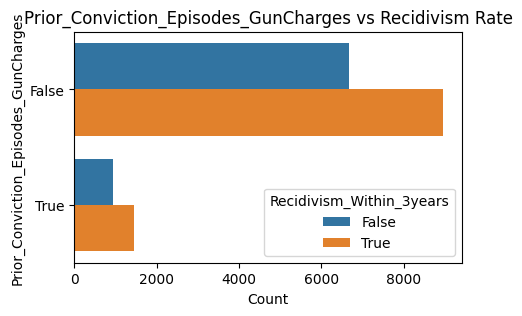

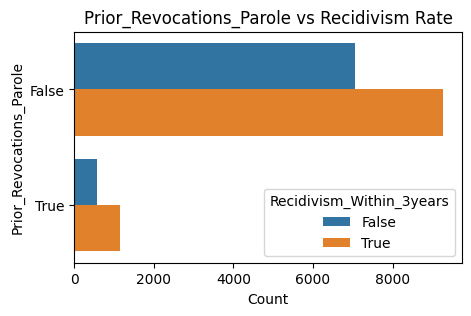

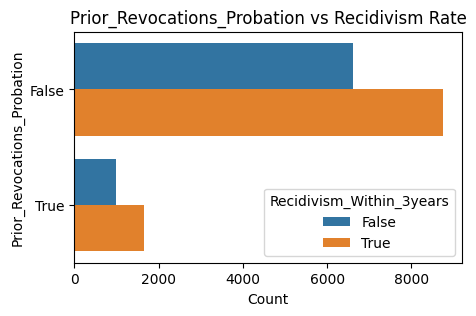

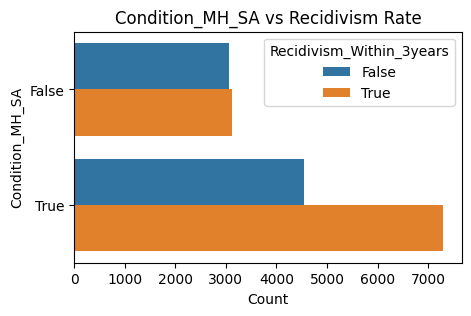

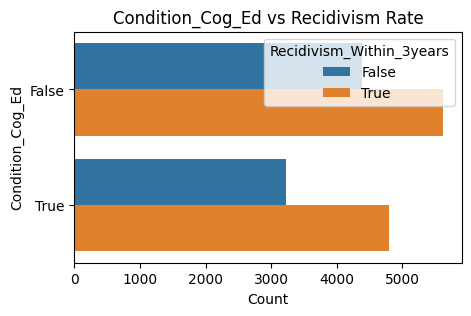

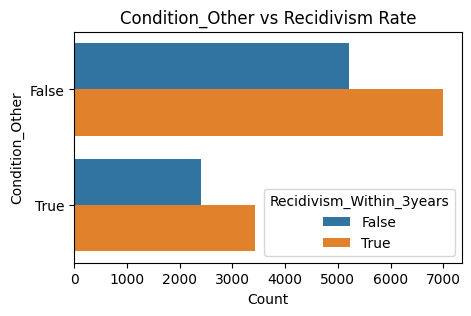

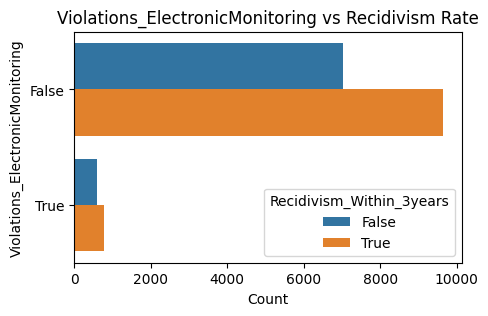

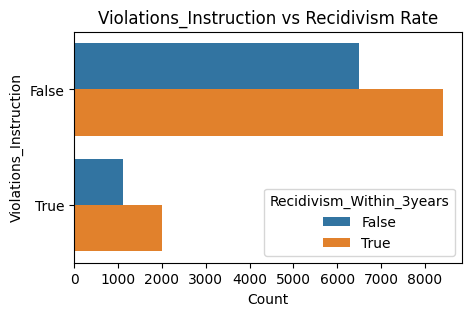

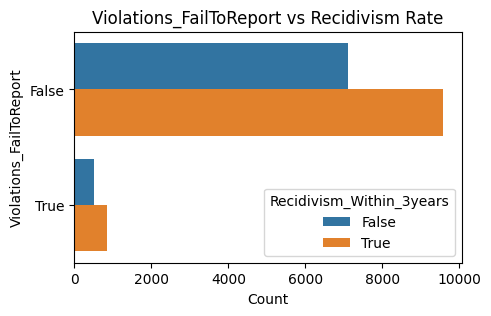

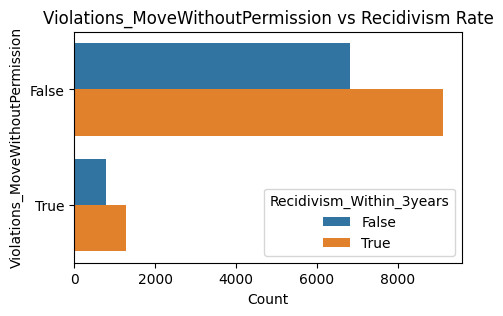

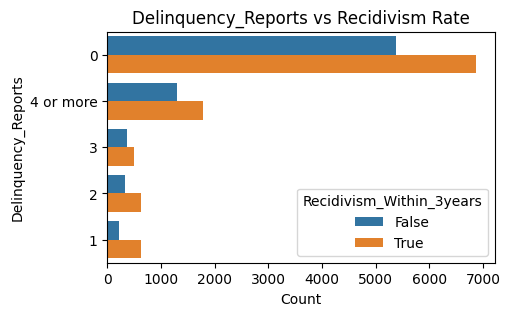

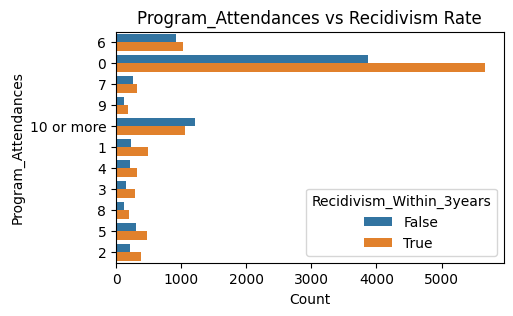

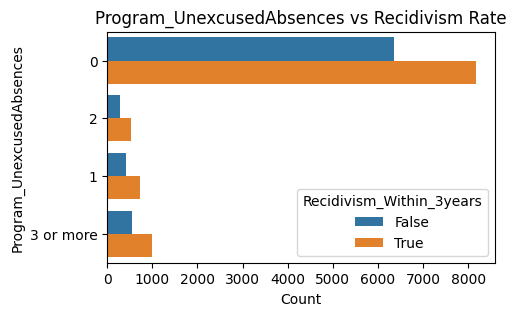

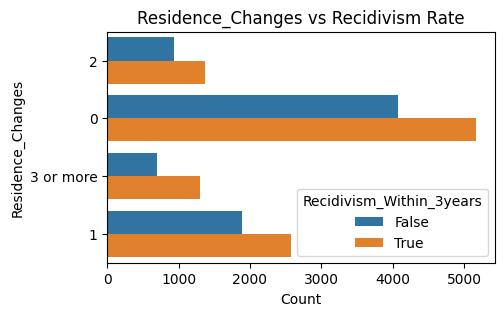

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


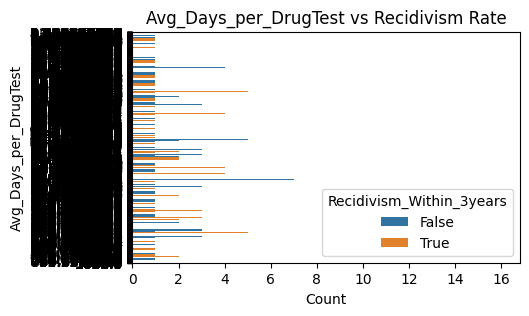

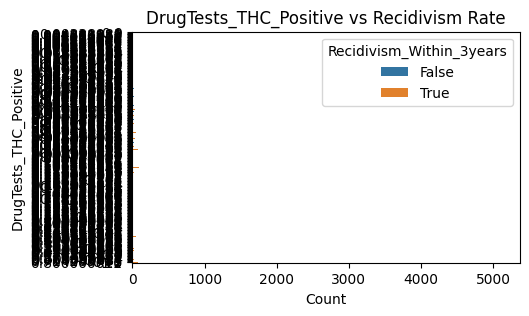

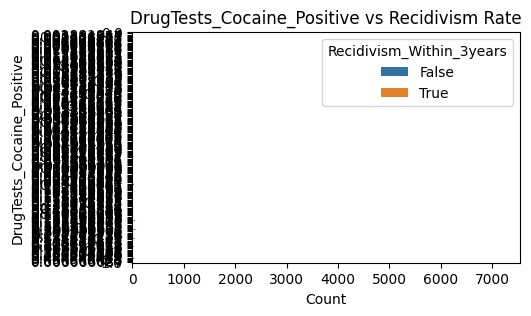

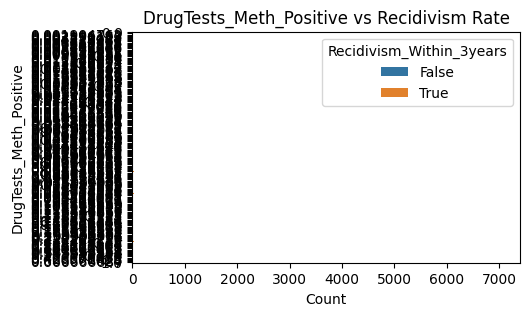

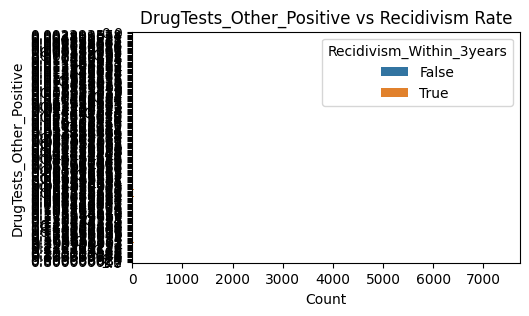

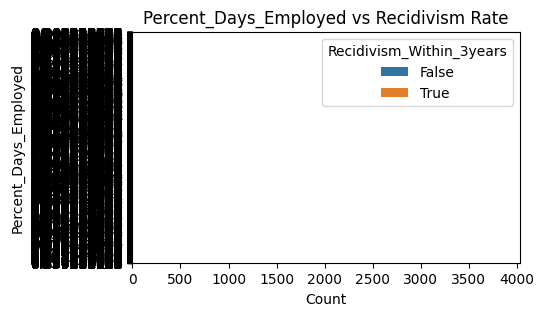

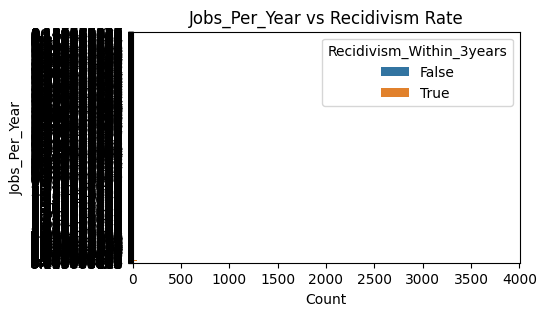

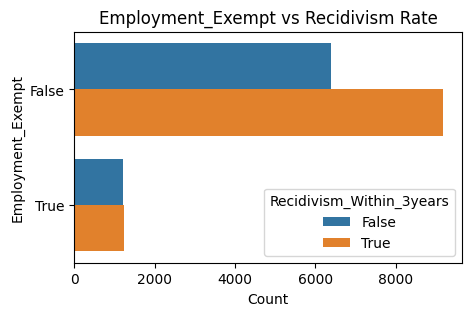

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
def hor_graph(df, column_name):
  plt.figure(figsize=(5, 3))
  sns.countplot(y=column_name, data=df, hue="Recidivism_Within_3years")
  plt.title(column_name + " vs Recidivism Rate")
  plt.xlabel("Count")
  plt.ylabel(column_name)
  plt.show()


column_names = df.columns.tolist()
column_names.remove("Recidivism_Within_3years")
column_names.remove("Recidivism_Arrest_Year1") #no need to graph obvious correlation
column_names.remove("Recidivism_Arrest_Year2")
column_names.remove("Recidivism_Arrest_Year3")
column_names.remove("ID")

for name in column_names:
  hor_graph(df, name)


# Data Cleaning

In [6]:
df.isnull().sum()


,0
ID,0
Gender,0
Race,0
Age_at_Release,0
Residence_PUMA,0
Gang_Affiliated,2217
Supervision_Risk_Score_First,330
Supervision_Level_First,1212
Education_Level,0
Dependents,0


- Gang_Affiliated can be default False
- Supervision_Risk_Score_First can be averaged
- Supervision_Level_First will be "Standard"
- Prison_Offense can be "Other"
- Avg_Days_per_DrugTest can be averaged
- DrugTests_THC_Positive can be 0 default
- DrugTests_Cocaine_Positive can be 0 default
- DrugTests_Other_Positive can be 0 default
- Percent_Days_Employed can be averaged
- Jobs_Per_Year can be 0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18028 entries, 0 to 18027
Data columns (total 53 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 18028 non-null  int64  
 1   Gender                                             18028 non-null  object 
 2   Race                                               18028 non-null  object 
 3   Age_at_Release                                     18028 non-null  object 
 4   Residence_PUMA                                     18028 non-null  int64  
 5   Gang_Affiliated                                    15811 non-null  object 
 6   Supervision_Risk_Score_First                       17698 non-null  float64
 7   Supervision_Level_First                            16816 non-null  object 
 8   Education_Level                                    18028 non-null  object 
 9   Depend

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Columns based on the specified imputation strategies
default_false_cols = ['Gang_Affiliated']
default_standard_cols = ['Supervision_Level_First']
default_other_cols = ['Prison_Offense']
average_cols = [
    'Supervision_Risk_Score_First', 'Avg_Days_per_DrugTest',
    'Percent_Days_Employed' #, 'Jobs_Per_Year'
]
default_zero_cols = [ #we also wanna clean up the decimal value to prevent discrempacy, basically positive number here means they did drug so
    'DrugTests_THC_Positive', 'DrugTests_Cocaine_Positive',
    'DrugTests_Meth_Positive', 'DrugTests_Other_Positive'
]

df[default_zero_cols] = df[default_zero_cols].map(lambda x: 1 if x > 0 else 0)
# print(df[default_zero_cols].head())

df['Jobs_Per_Year'] = df['Jobs_Per_Year'].fillna(0)
df['Jobs_Per_Year'] = np.ceil(df['Jobs_Per_Year']).astype(int) #we wanna round up the decimal too


default_false_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="constant", fill_value=False)),
    ('encoder', OneHotEncoder(drop='if_binary'))
])

default_standard_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="constant", fill_value="Standard")),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

default_other_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="constant", fill_value="Other")),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

average_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean"))
])

default_zero_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="constant", fill_value=0))
])

#num for rest
num_features = df.select_dtypes(include=['float64', 'int64']).columns.difference(
    average_cols + default_zero_cols
).difference(['ID'])
# num_features.drop('ID')
#cat for rest
cat_features = df.select_dtypes(include=['object']).columns.difference(
    default_false_cols + default_standard_cols + default_other_cols
)


num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="most_frequent")),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine all pipelines
full_pipeline = ColumnTransformer([
    ('default_false', default_false_pipeline, default_false_cols),
    ('default_standard', default_standard_pipeline, default_standard_cols),
    ('default_other', default_other_pipeline, default_other_cols),
    ('average', average_pipeline, average_cols),
    ('default_zero', default_zero_pipeline, default_zero_cols),
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features)
])


In [9]:
from sklearn.model_selection import train_test_split
X = df.drop(columns="Recidivism_Within_3years", axis = 1)
y = df["Recidivism_Within_3years"]
X.drop(columns="Recidivism_Arrest_Year1", axis = 1)
X.drop(columns="Recidivism_Arrest_Year2", axis = 1)
X.drop(columns="Recidivism_Arrest_Year3", axis = 1)
X.drop(columns="ID", axis = 1)
# X.drop(columns="num__ID", axis = 1)

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=49)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size= 0.1, random_state=49)

In [10]:
X_train_transformed = full_pipeline.fit_transform(X_train)
X_test_transformed = full_pipeline.fit_transform(X_test)


# Classification Model Training and Predicting

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


log_reg = LogisticRegression(random_state=49)
tree_clf = DecisionTreeClassifier(random_state=49)
forest_clf = RandomForestClassifier(random_state=49)


log_reg.fit(X_train_transformed, y_train)
tree_clf.fit(X_train_transformed, y_train)
forest_clf.fit(X_train_transformed, y_train)


log_reg_preds = log_reg.predict(X_test_transformed)
tree_clf_preds = tree_clf.predict(X_test_transformed)
forest_clf_preds = forest_clf.predict(X_test_transformed)


print("Logistic Regression Predictions:", log_reg_preds)
print("Decision Tree Predictions:", tree_clf_preds)
print("Random Forest Predictions:", forest_clf_preds)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Predictions: [ True  True False ... False  True False]
Decision Tree Predictions: [ True False  True ... False  True False]
Random Forest Predictions: [ True  True False ...  True  True False]


In [12]:
log_reg_coefficients = log_reg.coef_[0]
log_reg_feature_importance = np.abs(log_reg_coefficients)

print("Logistic Regression Feature Importance:", log_reg_feature_importance)

feature_names = full_pipeline.get_feature_names_out()


importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': log_reg_feature_importance
}).sort_values(by='Importance', ascending=False)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display DataFrame
print(importance_df)

Logistic Regression Feature Importance: [8.90876715e-01 7.81510083e-02 1.25011339e-01 7.21751152e-02
 5.36797453e-02 6.77460293e-02 8.87367530e-02 1.89589913e-01
 1.61405719e-01 3.90132004e-02 1.20563669e-04 1.77214587e+00
 5.20454716e-02 7.28116632e-02 2.98354421e-01 1.22807766e-01
 3.67087687e-01 6.47552231e-02 7.12470973e-01 4.90377655e-01
 1.71683113e-01 2.80801713e-02 1.36258758e-01 3.68245741e-01
 7.10959839e-01 1.22103201e-01 4.96019375e-01 1.96020370e-01
 1.87725312e-01 4.95430402e-01 1.58717417e-02 4.04793032e-02
 8.24865428e-02 2.38931273e-02 9.47323102e-03 1.69111397e-01
 2.86509348e-02 1.80951339e-01 3.11938571e-01 7.59000624e-02
 7.82504502e-02 2.13798636e-02 6.83387883e-02 1.75920457e-01
 1.94986353e-02 9.52991418e-02 4.07659478e-01 3.92924000e-01
 1.99132260e-01 6.89015572e-02 8.61149704e-03 3.02719700e-03
 5.03703871e-02 5.33328478e-03 1.11381758e-01 1.25967160e-02
 1.23563966e-01 2.48427581e-02 1.06383740e-03 3.63441302e-02
 7.92402412e-02 7.81631642e-02 1.57270843e-01

In [13]:
tree_feature_importance = tree_clf.feature_importances_

print("Decision Tree Feature Importance:", tree_feature_importance)

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': tree_feature_importance
}).sort_values(by='Importance', ascending=False)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)



# Display DataFrame
print(importance_df)

Decision Tree Feature Importance: [0.02502886 0.00511687 0.00331799 0.00676477 0.00609924 0.00891613
 0.00619606 0.00423306 0.00185426 0.04181983 0.07661819 0.13094786
 0.00492085 0.00449223 0.00260138 0.00455229 0.01298122 0.0598411
 0.00480807 0.0053589  0.00696627 0.0039957  0.00418091 0.00701008
 0.01907662 0.00852469 0.00514719 0.00267667 0.00356012 0.00849747
 0.00607274 0.00731249 0.0047256  0.00971449 0.00704865 0.00785919
 0.00424887 0.00643964 0.0027198  0.00583839 0.00777765 0.0055802
 0.00736305 0.00611384 0.00476228 0.00111909 0.00568722 0.00646203
 0.00384898 0.00630403 0.00492036 0.00496892 0.00404758 0.00353096
 0.00328468 0.00282551 0.00378458 0.00624525 0.00580955 0.00566527
 0.00484771 0.00658142 0.0101215  0.01864165 0.00742264 0.00406319
 0.00355193 0.00383514 0.02275418 0.00713237 0.00517233 0.00531961
 0.00498375 0.00356743 0.00636516 0.00658942 0.00702773 0.00727423
 0.00436849 0.006626   0.00531926 0.00381209 0.00338897 0.00656355
 0.00719632 0.00603787 0.00820

In [14]:
forest_feature_importance = forest_clf.feature_importances_

print("Random Forest Feature Importance:", forest_feature_importance)

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': forest_feature_importance
}).sort_values(by='Importance', ascending=False)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# Display DataFrame
print(importance_df)

Random Forest Feature Importance: [0.01857478 0.00724961 0.00693636 0.00934349 0.00686453 0.0084581
 0.00783142 0.00704467 0.00328035 0.04154398 0.05025454 0.08001969
 0.00870287 0.00455872 0.00443489 0.00402093 0.02021565 0.04286102
 0.00603366 0.00899209 0.00735158 0.00687342 0.00571011 0.00637169
 0.01470323 0.00889014 0.00364629 0.00387171 0.00396393 0.0088345
 0.00969047 0.00816138 0.00769425 0.008934   0.00881862 0.00982435
 0.00915979 0.00633566 0.00615265 0.00803943 0.00802978 0.00659244
 0.00605866 0.00426616 0.00530097 0.00130624 0.00656161 0.00808207
 0.00559695 0.00578944 0.0055451  0.00481515 0.00486688 0.00460456
 0.00360682 0.00304659 0.00677207 0.00577933 0.00573225 0.00556037
 0.00479625 0.00417459 0.00934118 0.01508302 0.00649765 0.00562761
 0.00529133 0.00456296 0.01060089 0.00923303 0.00665415 0.00636739
 0.00497878 0.00424184 0.00617382 0.00929819 0.00880756 0.00679126
 0.00608106 0.00758517 0.00759419 0.00687406 0.00715202 0.00781733
 0.00685552 0.00682462 0.01193

# Cluster Model Training
There was a problem with clustering as it was not clustering equally

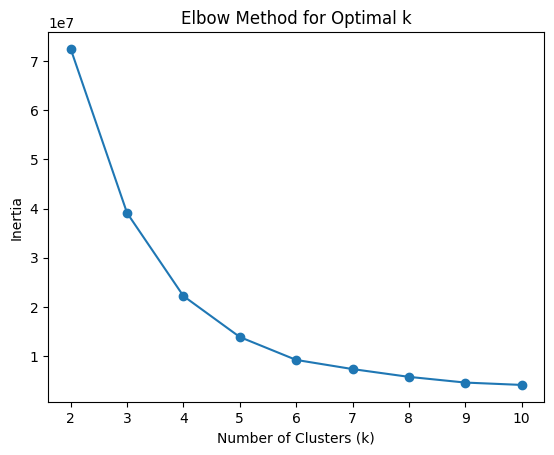

Silhouette Score for k=4: 0.6181283193559228


In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X_preprocessed = full_pipeline.fit_transform(df)

inertia = []
k_values = range(2, 11)  # Evaluate k from 2 to 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_preprocessed)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()


# Fit K-means with optimal k (e.g., choose based on elbow plot or silhouette score)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_preprocessed)

# Evaluate clusters using Silhouette Score
silhouette_avg = silhouette_score(X_preprocessed, df['Cluster'])
print(f"Silhouette Score for k={optimal_k}: {silhouette_avg}")


In [35]:
df['Cluster'] = kmeans.labels_

column_names = df.columns.tolist()
column_names.remove('ID')

recidivism_rates = df.groupby('Cluster')['Recidivism_Within_3years'].mean()
print("Recidivism Rates by Cluster:")
print(recidivism_rates)


Recidivism Rates by Cluster:
Cluster
0    0.578440
1    0.588629
2    0.592985
3    0.575113
Name: Recidivism_Within_3years, dtype: float64


In [34]:
# Retrieve cluster centroids
centroids = kmeans.cluster_centers_

# Map centroids back to original feature names
print("Cluster Centroids (Preprocessed Features):")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}:")
    sorted_features = sorted(zip(feature_names, centroid), key=lambda x: x[1], reverse=True)
    for feature, value in sorted_features:
        print(f"  {feature}: {value:.2f}")
    print("\n")


Cluster Centroids (Preprocessed Features):
Cluster 0:
  average__Avg_Days_per_DrugTest: 34.14
  average__Supervision_Risk_Score_First: 6.32
  cat__Gender_M: 0.87
  cat__Program_UnexcusedAbsences_0: 0.73
  cat__Delinquency_Reports_0: 0.64
  average__Percent_Days_Employed: 0.54
  cat__Race_BLACK: 0.53
  cat__Residence_Changes_0: 0.51
  cat__Prior_Conviction_Episodes_Drug_0: 0.49
  cat__Race_WHITE: 0.47
  cat__Education_Level_High School Diploma: 0.45
  cat__Prior_Conviction_Episodes_Prop_0: 0.45
  cat__Prior_Arrest_Episodes_Violent_0: 0.43
  default_standard__Supervision_Level_First_Standard: 0.41
  cat__Education_Level_Less than HS diploma: 0.38
  cat__Program_Attendances_0: 0.37
  default_zero__DrugTests_THC_Positive: 0.36
  cat__Dependents_0: 0.33
  default_standard__Supervision_Level_First_Specialized: 0.33
  cat__Prison_Years_Less than 1 year: 0.33
  cat__Prior_Arrest_Episodes_Misd_6 or more: 0.31
  cat__Prison_Years_1-2 years: 0.31
  cat__Prior_Conviction_Episodes_Misd_0: 0.31
  ca

# Classification Model Results

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

log_reg_preds_class = (log_reg_preds >= 0.5).astype(int)
forest_clf_preds_class = (forest_clf_preds >= 0.5).astype(int)

print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_preds_class))
print("Logistic Regression Precision:", precision_score(y_test, log_reg_preds_class))
print("Logistic Regression Recall:", recall_score(y_test, log_reg_preds_class))
print("Logistic Regression F1 Score:", f1_score(y_test, log_reg_preds_class))

print("Decision Tree Accuracy:", accuracy_score(y_test, tree_clf_preds))
print("Decision Tree Precision:", precision_score(y_test, tree_clf_preds))
print("Decision Tree Recall:", recall_score(y_test, tree_clf_preds))
print("Decision Tree F1 Score:", f1_score(y_test, tree_clf_preds))

print("Random Forest Accuracy:", accuracy_score(y_test, forest_clf_preds_class))
print("Random Forest Precision:", precision_score(y_test, forest_clf_preds_class))
print("Random Forest Recall:", recall_score(y_test, forest_clf_preds_class))
print("Random Forest F1 Score:", f1_score(y_test, forest_clf_preds_class))

Logistic Regression Accuracy: 0.721297836938436
Logistic Regression Precision: 0.7420178799489144
Logistic Regression Recall: 0.8137254901960784
Logistic Regression F1 Score: 0.7762191048764195
Decision Tree Accuracy: 0.6261785912368275
Decision Tree Precision: 0.6917874396135266
Decision Tree Recall: 0.6685340802987861
Decision Tree F1 Score: 0.6799620132953467
Random Forest Accuracy: 0.7157515252357183
Random Forest Precision: 0.7312629399585922
Random Forest Recall: 0.8244631185807656
Random Forest F1 Score: 0.7750713188501207


# Classification Model Tuning + result after tuning

We'll focused on Random Forest because Random Forest can capture more complex relationship in the data.

In [19]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

rf = RandomForestClassifier(random_state=49)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None,5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_train_transformed, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_transformed)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Best F1 Score: 0.7672819328936344


In [20]:
import pandas as pd
final_model = grid_search.best_estimator_

feature_importances = grid_search.best_estimator_.feature_importances_
feature_names = full_pipeline.get_feature_names_out()


importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display DataFrame
print(importance_df)

                                               Feature  Importance
11                      average__Percent_Days_Employed    0.154333
9                average__Supervision_Risk_Score_First    0.052958
0                  default_false__Gang_Affiliated_True    0.049428
10                      average__Avg_Days_per_DrugTest    0.038190
63     cat__Prior_Arrest_Episodes_PPViolationCharges_0    0.037956
24                     cat__Age_at_Release_48 or older    0.037526
86               cat__Prior_Conviction_Episodes_Misd_0    0.027602
17                                 num__Residence_PUMA    0.026107
68   cat__Prior_Arrest_Episodes_PPViolationCharges_...    0.021412
16                                  num__Jobs_Per_Year    0.020748
62           cat__Prior_Arrest_Episodes_Misd_6 or more    0.018370
69               cat__Prior_Arrest_Episodes_Property_0    0.015791
46                 cat__Prior_Arrest_Episodes_Felony_1    0.013977
47        cat__Prior_Arrest_Episodes_Felony_10 or more    0.01

In [21]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("Random Forest Precision:", precision_score(y_test, y_pred))
print("Random Forest Recall:", recall_score(y_test, y_pred))
print("Random Forest F1 Score:", f1_score(y_test, y_pred))

Random Forest Accuracy: 0.7154742096505824
Random Forest Precision: 0.7196850393700788
Random Forest Recall: 0.8534080298786181
Random Forest F1 Score: 0.7808628791114908
